# Use the Boston house dataset to perform the regression based on a random forest and a decision tree.

## 1. Explain how the bagging strategy can be used in Random Forest.

Random Forest uses **bagging** to train many decision trees on random data subsets, then combines their outputs to achieve better performance and lower variance. It prevents overfitting and makes the overall model robust and accurate.

**Step 1: Bootstrap sampling**


*   From the original training dataset, Random Forest creates many random subsets by sampling with replacement.
*   Each subset is used to train a different decision tree.

**Step 2: Independent tree training**

Each tree is trained independently on its own bootstrap sample.

*   Some data points are repeated.
*   Some data points are left out.

**Step 3: Predictions aggregation**

After all trees are trained:

*   For regression, the final output is the average of all tree predictions.
*   For classification, it’s the majority vote among trees.







<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1829811443.py:15: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(url, sep="\s+", skiprows=22, header=None)


Dataset shape: (506, 13)
Target shape: (506,)
Decision Tree MSE: 10.416
Random Forest MSE: 7.902


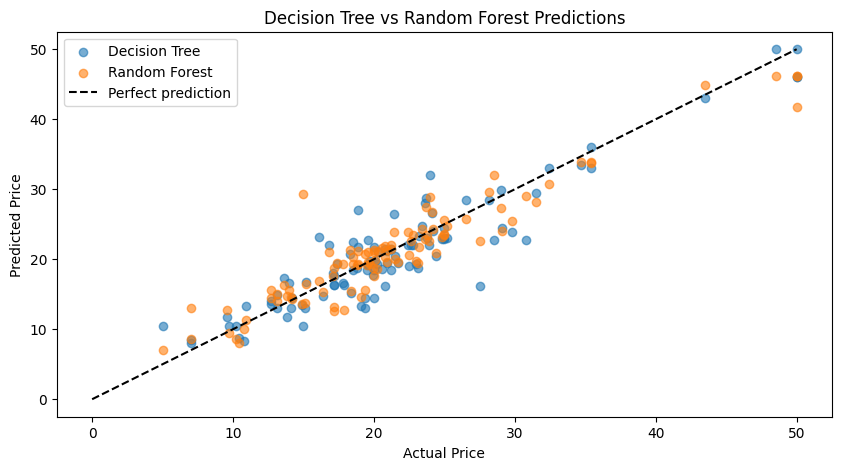

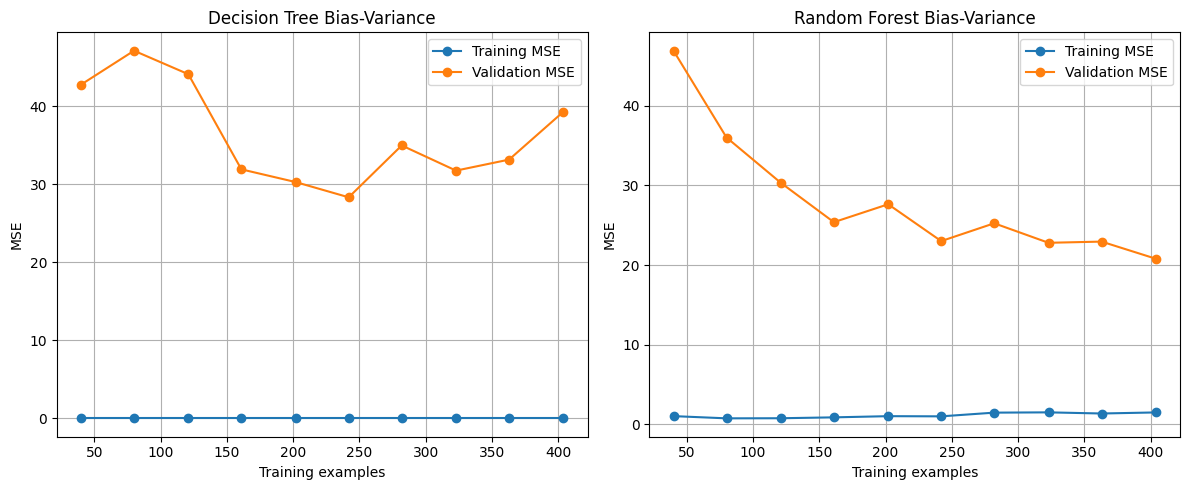

In [ ]:
# 📘 Boston Housing Regression: Decision Tree vs Random Forest

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# 1️⃣ Load dataset from URL
url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(url, sep="\s+", skiprows=22, header=None)

# the data is split into two parts vertically
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X = data
y = target

print("Dataset shape:", X.shape)
print("Target shape:", y.shape)

# 2️⃣ Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3️⃣ Train models
# decision tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# random forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 4️⃣ Evaluate performance
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Decision Tree MSE:", round(mse_dt, 3))
print("Random Forest MSE:", round(mse_rf, 3))

# 5️⃣ Visualize predictions
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_dt, label="Decision Tree", alpha=0.6)
plt.scatter(y_test, y_pred_rf, label="Random Forest", alpha=0.6)
plt.plot([0, 50], [0, 50], 'k--', label="Perfect prediction")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Decision Tree vs Random Forest Predictions")
plt.legend()
plt.show()

# 6️⃣ Bias-Variance Visualization
def plot_learning_curves(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mse = -np.mean(train_scores, axis=1)
    test_mse = -np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_mse, 'o-', label="Training MSE")
    plt.plot(train_sizes, test_mse, 'o-', label="Validation MSE")
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_learning_curves(DecisionTreeRegressor(random_state=42), X, y, "Decision Tree Bias-Variance")
plt.subplot(1,2,2)
plot_learning_curves(RandomForestRegressor(n_estimators=100, random_state=42), X, y, "Random Forest Bias-Variance")
plt.tight_layout()
plt.show()
